# GMM Algorithm

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Read Dataset (PKL type)

In [2]:
with open('S5.pkl', 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [3]:
s2_data.keys()

dict_keys(['signal', 'label', 'subject'])

In [4]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]
c_az=s2_data['signal']['chest']['ACC'][0:,2]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]
c_emg=s2_data['signal']['chest']['EMG'][:,0]
c_eda=s2_data['signal']['chest']['EDA'][:,0]
c_temp=s2_data['signal']['chest']['Temp'][:,0]
c_resp=s2_data['signal']['chest']['Resp'][:,0]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]
w_label=s2_data['label']

In [5]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T
numpy_data2=np.array([w_ax, w_ay, w_az,w_bvp,w_eda,w_temp,w_label])
numpy_data2=numpy_data2.T

<ipython-input-5-aabd8313c500>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  numpy_data2=np.array([w_ax, w_ay, w_az,w_bvp,w_eda,w_temp,w_label])


## Converting pickle dictionary to Pandas Data frame

In [7]:
df1 = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 
# df1.to_csv('f1')
df1.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.8606,0.0742,0.8570,-0.275803,0.016800,3.888321,34.119934,0.044250,0.0
1,0.8456,0.0780,0.8574,-0.229752,0.014969,3.913116,34.142822,0.032043,0.0
2,0.8410,0.0874,0.7570,-0.195282,0.015335,3.873062,34.135193,0.015259,0.0
3,0.8418,0.0986,0.5782,-0.164474,-0.003708,3.883362,34.136749,-0.062561,0.0
4,0.8554,0.0984,0.3332,-0.134811,0.017624,3.886795,34.118439,0.016785,0.0


# Drop irrelevant features

In [8]:
df1.drop(['c_ax','c_ay','c_az'], axis=1, inplace=True)
df1

,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,-0.275803,0.016800,3.888321,34.119934,0.044250,0.0
1,-0.229752,0.014969,3.913116,34.142822,0.032043,0.0
2,-0.195282,0.015335,3.873062,34.135193,0.015259,0.0
3,-0.164474,-0.003708,3.883362,34.136749,-0.062561,0.0
4,-0.134811,0.017624,3.886795,34.118439,0.016785,0.0
...,...,...,...,...,...,...
4380595,-0.008240,0.009293,10.231400,34.971069,7.070923,0.0
4380596,-0.000778,-0.004074,10.231018,34.900116,7.044983,0.0
4380597,0.014877,-0.013687,10.231018,34.949463,7.057190,0.0
4380598,0.029251,-0.001007,10.230637,34.971069,7.090759,0.0


In [9]:
#data shape
print("shape",df1.shape)
print(len(df1))
print("w_label",len(w_label))

shape (4380600, 6)
4380600
w_label 4380600


## Visualizing dataset labels comparision

baseline_indices 838600
stress_indices 451500
amusement_indices 261800
meditation_indices 555800
others_indices 2142700


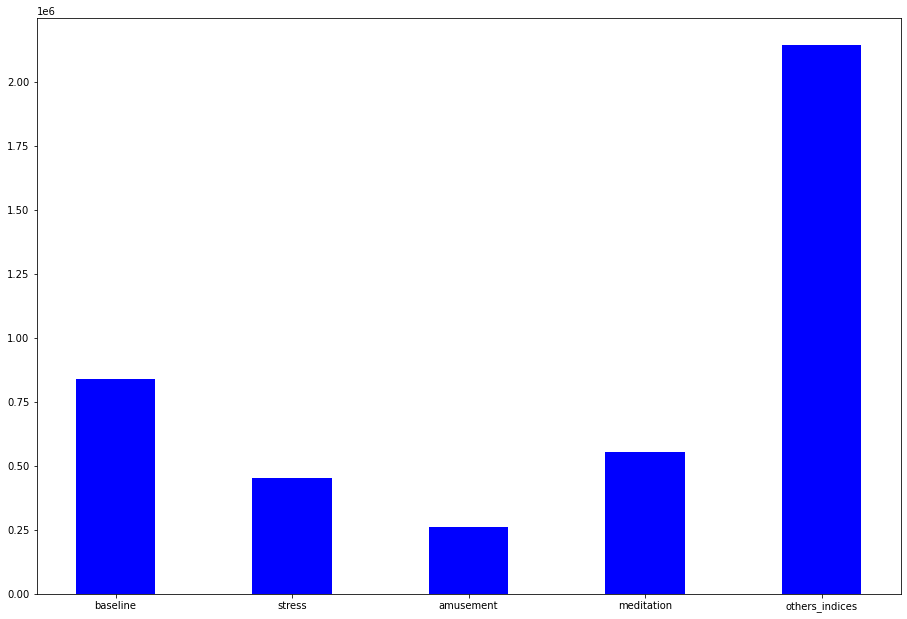

In [10]:
baseline_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]
others_indices = np.nonzero(s2_data['label']==0)[0]


print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))
print("others_indices", len(others_indices))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["baseline", "stress", "amusement","meditation", "others_indices"]
y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices),len(others_indices)]
ax.bar(langs,y_ax,color = 'b', width = 0.45)
fig.savefig('f1.png')
plt.show()

#talk about imbalanced data set

## Data Shapes from Wrist and Chist sensors

c_ax 4380600
c_ay 4380600
c_az 4380600
c_ecg 4380600
c_emg 4380600
c_eda 4380600
c_temp 4380600
c_resp 4380600
w_ax 200256
w_ay 200256
w_az 200256
w_bvp 400512
w_eda 25032
w_temp 25032
[0 0 0 ... 0 0 0] 4380600
Min label value 0 Max label value 7


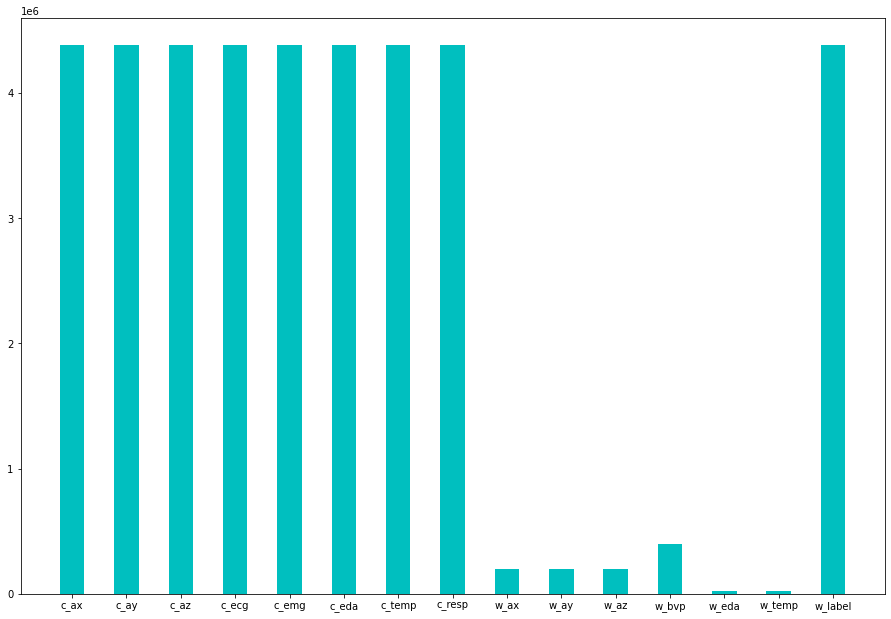

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline
print("c_ax",len(c_ax))
print("c_ay",len(c_ay))
print("c_az",len(c_az))
print("c_ecg",len(c_ecg))
print("c_emg",len(c_emg))
print("c_eda",len(c_eda))
print("c_temp",len(c_temp))
print("c_resp",len(c_resp))
print("w_ax",len(w_ax))
print("w_ay",len(w_ay))
print("w_az",len(w_az))
print("w_bvp",len(w_bvp))
print("w_eda",len(w_eda))
print("w_temp",len(w_temp))
print(w_label, len(w_label))
print("Min label value", min(w_label), "Max label value",max(w_label))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp","w_label"]
y_ax = [len(c_ax),len(c_ay),len(c_az),len(c_ecg),len(c_emg),len(c_eda),len(c_temp),len(c_resp),len(w_ax),len(w_ay),len(w_az),len(w_bvp),len(w_eda),len(w_temp),len(w_label)]
ax.bar(langs,y_ax,color = 'c', width = 0.45)

plt.show()
plt.savefig('f2.png',dpi=100)
#Since data samples from chest device are 21 times more than data samples of wrist device, thus data set is unbalanced,
#and data from wrsit sensor should be excluded. Chest device gives 4255300 samples per sensor, whereas wrist device gives only 194528 samples. 

## Data Distribution for Chest sensor

array([[<AxesSubplot:title={'center':'c_ecg'}>,
        <AxesSubplot:title={'center':'c_emg'}>],
       [<AxesSubplot:title={'center':'c_eda'}>,
        <AxesSubplot:title={'center':'c_temp'}>],
       [<AxesSubplot:title={'center':'c_resp'}>,
        <AxesSubplot:title={'center':'w_label'}>]], dtype=object)

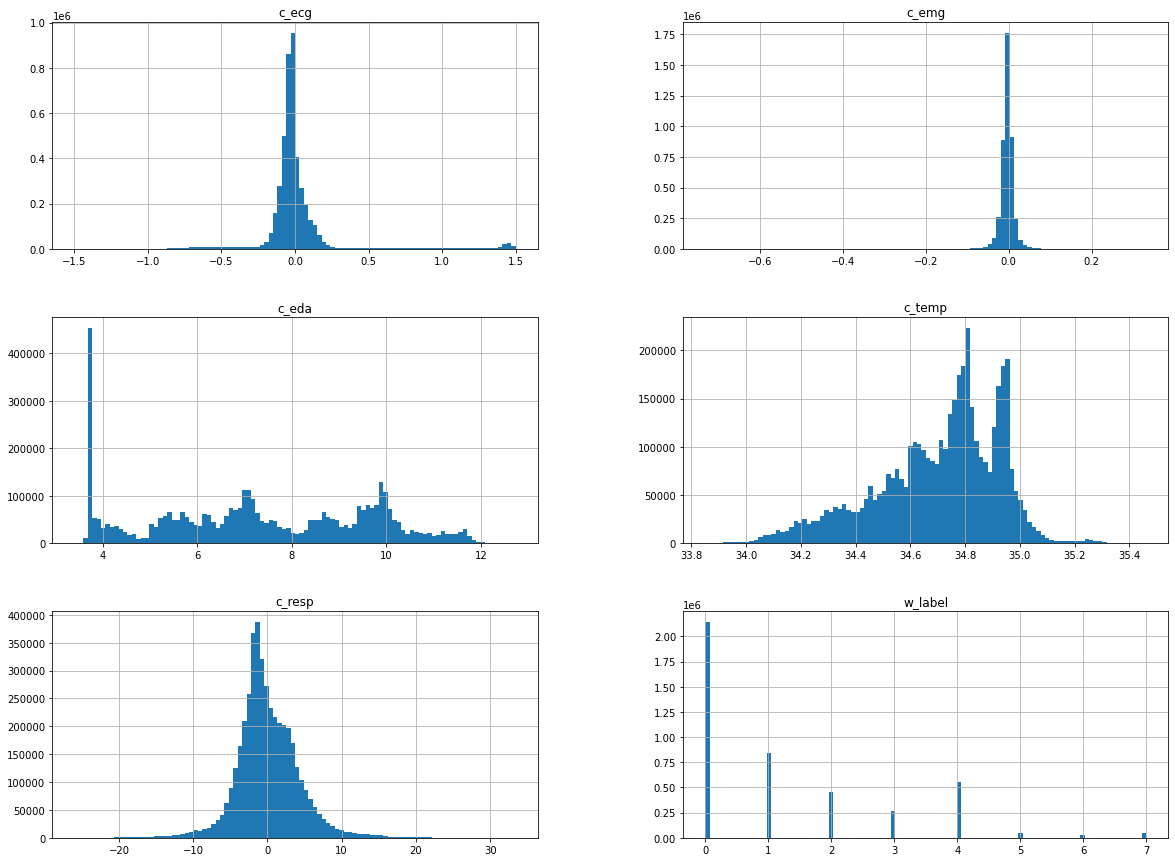

In [12]:
df1.hist(bins=100, figsize = (20,15))

## Other way to see outliers within the feature

<AxesSubplot:>

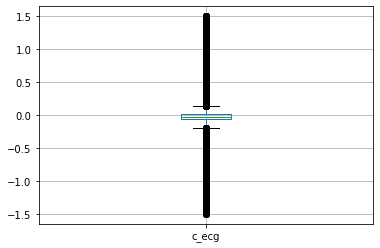

In [13]:
import seaborn as sns
import matplotlib

# sns.boxplot(df1['c_ecg'])
df1.boxplot(column=['c_ecg'])

## Calculating IQR and Outliers

In [14]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
print((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR)) )
print(df1.shape)

IQR is
 c_ecg      0.082535
c_emg      0.013916
c_eda      3.987122
c_temp     0.304352
c_resp     4.679871
w_label    2.000000
dtype: float64
         c_ecg  c_emg  c_eda  c_temp  c_resp  w_label
0         True  False  False   False   False    False
1         True  False  False   False   False    False
2         True  False  False   False   False    False
3        False  False  False   False   False    False
4        False  False  False   False   False    False
...        ...    ...    ...     ...     ...      ...
4380595  False  False  False   False   False    False
4380596  False  False  False   False   False    False
4380597  False  False  False   False   False    False
4380598  False  False  False   False   False    False
4380599  False  False  False   False   False    False

[4380600 rows x 6 columns]
(4380600, 6)


## Removing Outliers

In [15]:
df_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(3433167, 6)


In [16]:
df_out

,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
3,-0.164474,-0.003708,3.883362,34.136749,-0.062561,0.0
4,-0.134811,0.017624,3.886795,34.118439,0.016785,0.0
6,-0.080841,0.016617,3.873444,34.129089,-0.001526,0.0
8,-0.052414,-0.001053,3.895569,34.151978,0.016785,0.0
9,-0.038864,0.003342,3.873444,34.118439,-0.015259,0.0
...,...,...,...,...,...,...
4380595,-0.008240,0.009293,10.231400,34.971069,7.070923,0.0
4380596,-0.000778,-0.004074,10.231018,34.900116,7.044983,0.0
4380597,0.014877,-0.013687,10.231018,34.949463,7.057190,0.0
4380598,0.029251,-0.001007,10.230637,34.971069,7.090759,0.0


## Distribution of the Data after removing the outliers

array([[<AxesSubplot:title={'center':'c_ecg'}>,
        <AxesSubplot:title={'center':'c_emg'}>],
       [<AxesSubplot:title={'center':'c_eda'}>,
        <AxesSubplot:title={'center':'c_temp'}>],
       [<AxesSubplot:title={'center':'c_resp'}>,
        <AxesSubplot:title={'center':'w_label'}>]], dtype=object)

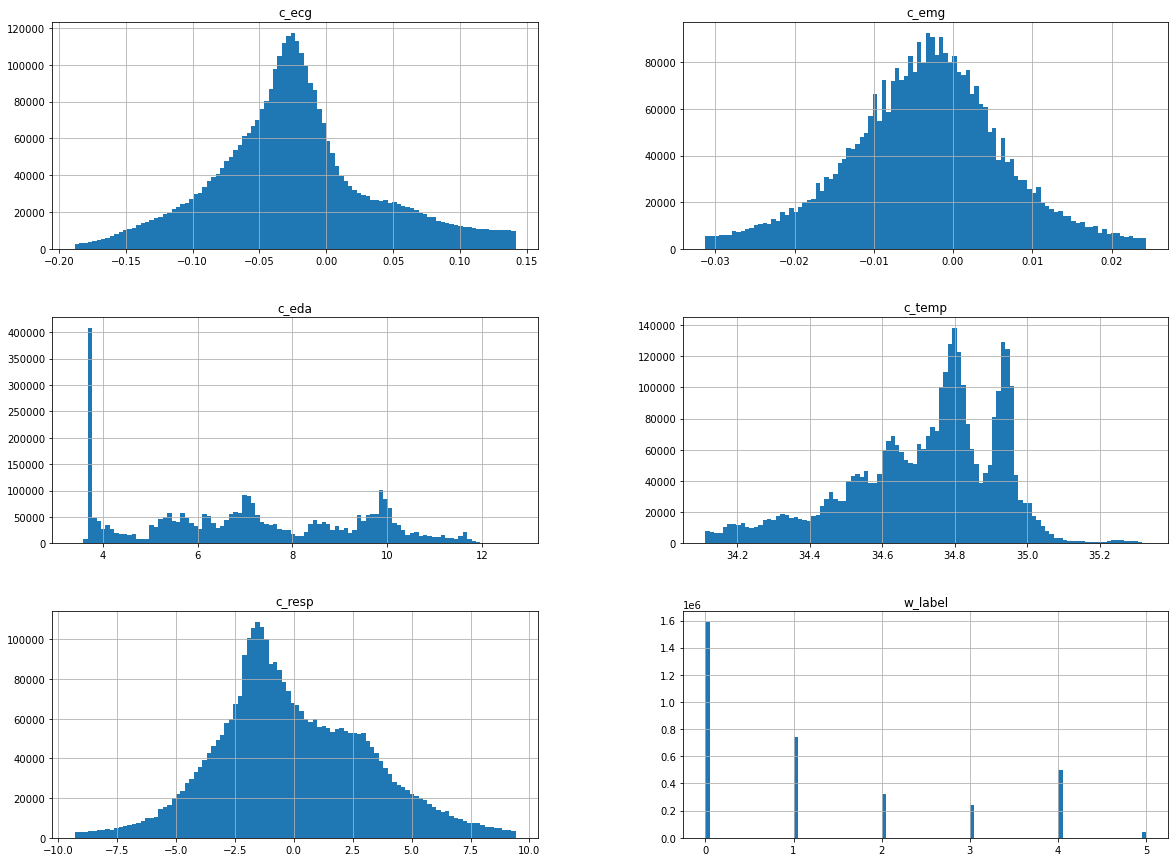

In [17]:
df_out.hist(bins=100, figsize = (20,15))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='c_ecg'>

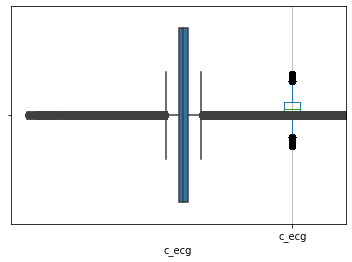

In [18]:
df_out.boxplot(column=['c_ecg'])

sns.boxplot(df1['c_ecg'])

In [19]:
(df_out.describe())

,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,3.433167e+06,3.433167e+06,3.433167e+06,3.433167e+06,3.433167e+06,3.433167e+06
mean,-2.436884e-02,-3.419480e-03,7.115339e+00,3.471908e+01,-6.240179e-02,1.254874e+00
std,6.041449e-02,9.906808e-03,2.299828e+00,2.070564e-01,3.233585e+00,1.507140e+00
min,-1.884155e-01,-3.126526e-02,3.402710e+00,3.411234e+01,-9.304810e+00,0.000000e+00
25%,-5.987549e-02,-9.567261e-03,5.328751e+00,3.460175e+01,-2.137756e+00,0.000000e+00
50%,-2.723694e-02,-3.158569e-03,7.014847e+00,3.476154e+01,-4.821777e-01,1.000000e+00
75%,4.531860e-03,2.746582e-03,9.276962e+00,3.487238e+01,2.142334e+00,2.000000e+00
max,1.416779e-01,2.439880e-02,1.271019e+01,3.532837e+01,9.413147e+00,5.000000e+00


In [20]:
def converter(w_label):
    if w_label==0:
        return 'transient'
    elif w_label==1:
        return 'baseline'
    elif w_label==2:
        return 'stress'
    elif w_label==3:
        return 'amusement'
    elif w_label==4:
        return 'meditation'   
    else:
        return 'ignored'

df1['Labels'] = df1['w_label'].apply(converter)
cols = df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
Labeled_Data = df1[cols]
Labeled_Data.drop(['w_label'], axis=1, inplace=True)
Labeled_Data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Labels,c_ecg,c_emg,c_eda,c_temp,c_resp
0,transient,-0.275803,0.016800,3.888321,34.119934,0.044250
1,transient,-0.229752,0.014969,3.913116,34.142822,0.032043
2,transient,-0.195282,0.015335,3.873062,34.135193,0.015259
3,transient,-0.164474,-0.003708,3.883362,34.136749,-0.062561
4,transient,-0.134811,0.017624,3.886795,34.118439,0.016785
...,...,...,...,...,...,...
4380595,transient,-0.008240,0.009293,10.231400,34.971069,7.070923
4380596,transient,-0.000778,-0.004074,10.231018,34.900116,7.044983
4380597,transient,0.014877,-0.013687,10.231018,34.949463,7.057190
4380598,transient,0.029251,-0.001007,10.230637,34.971069,7.090759


## Deleting rows for meditation, transient and ignored

In [21]:
filter1 = Labeled_Data['Labels'] == 'meditation'
Labeled_Data.drop(index=Labeled_Data[filter1].index, inplace = True)
filter2 = Labeled_Data['Labels'] == 'ignored'
Labeled_Data.drop(index=Labeled_Data[filter2].index, inplace = True)
filter3 = Labeled_Data['Labels'] == 'transient'
Labeled_Data.drop(index=Labeled_Data[filter3].index, inplace = True)
Labeled_Data.shape

# dfz = df_out[df_out.w_label != 0]
# dfz = df_out[df_out.w_label != 4]
# dfz = df_out[df_out.w_label != 5]
#define list of values
# values = [0, 4, 5]

#drop any rows that have 7 or 11 in the rebounds column
# df5 = df_out[df_out.w_label.isin(values) == False]
# df5.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1551900, 6)

## Line plot

Text(0, 0.5, 'sensor amplitude')

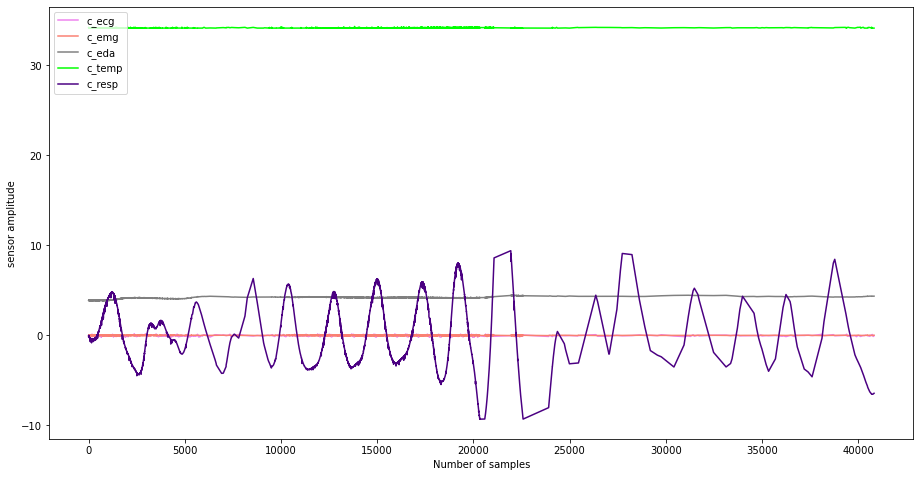

In [22]:
lens=np.arange(len(df_out['c_ecg'][:500]))

fig= plt.figure(figsize=(6,3))
axes= fig.add_axes([0.1,0.1,2,2])

axes.plot(df_out['c_ecg'][:9000],color='violet', label="c_ecg")
axes.plot(df_out['c_emg'][:9000],color='salmon', label="c_emg")
axes.plot(df_out['c_eda'][:9000],color='grey', label="c_eda")
axes.plot(df_out['c_temp'][:9000],color='lime', label="c_temp")
axes.plot(df_out['c_resp'][:9000],color='indigo', label="c_resp")

plt.legend(loc='upper left')
plt.xlabel("Number of samples")
plt.ylabel("sensor amplitude")

array([[<AxesSubplot:title={'center':'c_ecg'}>,
        <AxesSubplot:title={'center':'c_emg'}>],
       [<AxesSubplot:title={'center':'c_eda'}>,
        <AxesSubplot:title={'center':'c_temp'}>],
       [<AxesSubplot:title={'center':'c_resp'}>, <AxesSubplot:>]],
      dtype=object)

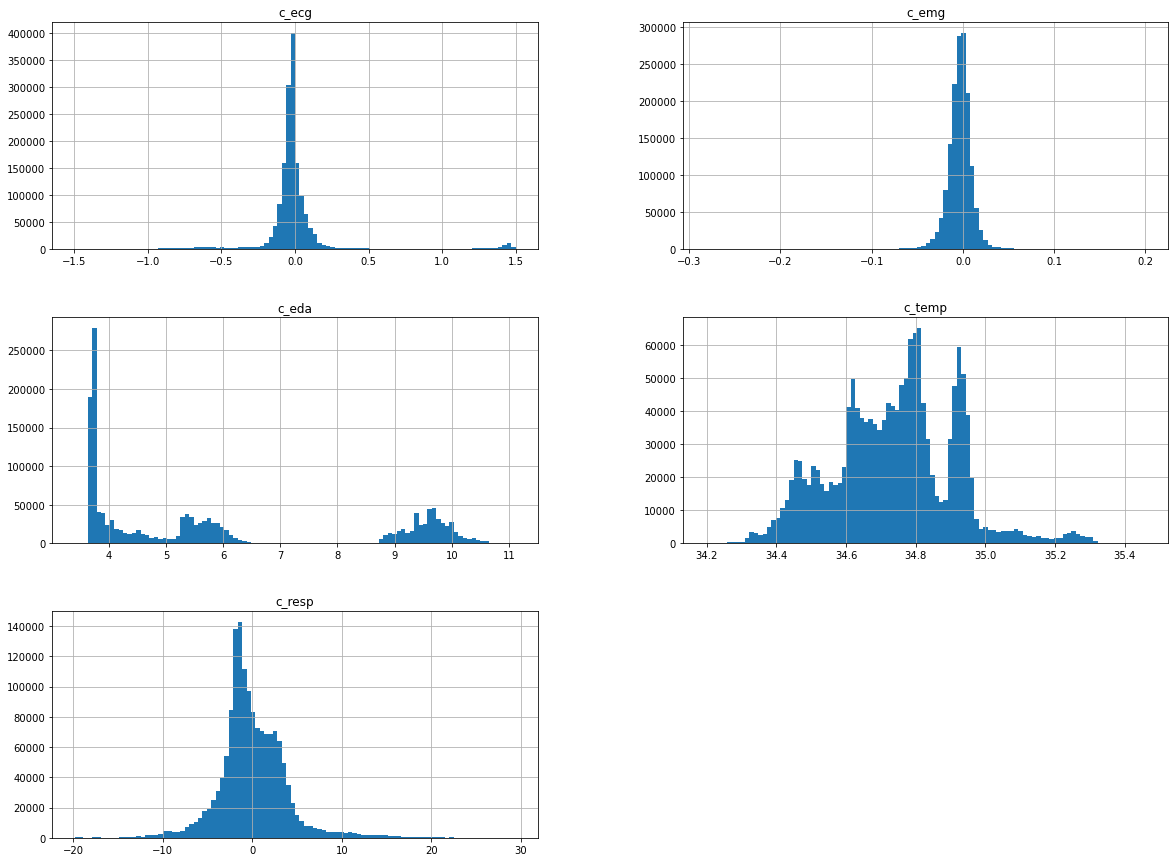

In [23]:
Labeled_Data.hist(bins=100, figsize = (20,15))

In [24]:
# df_out.to_csv('fx')

## Data Segmentation (Sliding Window)

In [25]:
#sliding window and feature extraction

X=Labeled_Data.iloc[:,1:]
X_mean=X.rolling(60).mean()
X_std=X.rolling(60).std()
Labeled_Data.head()

,Labels,c_ecg,c_emg,c_eda,c_temp,c_resp
195560,baseline,-0.028976,-0.007828,6.387711,34.251160,2.789307
195561,baseline,-0.029114,-0.003296,6.384277,34.252716,2.891541
195562,baseline,-0.030212,-0.005264,6.398392,34.249634,2.861023
195563,baseline,-0.030991,-0.003159,6.392288,34.298553,2.833557
195564,baseline,-0.031906,-0.001968,6.385803,34.326050,2.857971


## Feature Extraction

In [26]:
FeaturesDF=pd.concat([Labeled_Data.iloc[:,:1],X_mean,X_std],keys=['','Mean','SD'], axis=1)
FeaturesDF=FeaturesDF[59::30]
Label=FeaturesDF[('','Labels')]
X_new=FeaturesDF[[('Mean','c_ecg'),('SD','c_ecg'),('Mean','c_emg'),('SD','c_emg'),('Mean','c_eda'),('SD','c_eda'),('Mean','c_temp'),('SD','c_temp'),('Mean','c_resp'),('SD','c_resp')]]
pd.DataFrame(FeaturesDF.value_counts())

FeaturesDF

Mean                                           \
           Labels     c_ecg     c_emg     c_eda     c_temp    c_resp   
195619   baseline -0.027024 -0.003218  6.388919  34.303582  2.700272   
195649   baseline -0.023534 -0.003931  6.387952  34.307532  2.521617   
195679   baseline -0.016402 -0.003580  6.387107  34.309391  2.371674   
195709   baseline -0.008920 -0.003699  6.389033  34.304063  2.262014   
195739   baseline -0.004292 -0.002934  6.388620  34.305512  2.130712   
...           ...       ...       ...       ...        ...       ...   
2973039    stress  0.038158 -0.003989  9.712906  34.567273 -8.191961   
2973069    stress  0.045392 -0.003375  9.699841  34.571001 -8.113174   
2973099    stress  0.026302 -0.003867  9.686960  34.576087 -8.013713   
2973129    stress  0.042109 -0.003963  9.673011  34.574633 -7.891617   
2973159    stress  0.129523 -0.003361  9.657459  34.574915 -7.739944   

               SD                                          
            c_ecg     c_emg     c_eda    c_temp    c_resp  
195619   0.002090  0.009186  0.004977  0.027934  0.095312  
195649   0.003374  0.009201  0.005119  0.028906  0.159922  
195679   0.005158  0.008784  0.004710  0.029605  0.139286  
195709   0.003464  0.009975  0.016197  0.027818  0.078954  
195739   0.002624  0.010101  0.016235  0.025340  0.111984  
...           ...       ...       ...       ...       ...  
2973039  0.022726  0.007219  0.008277  0.029617  0.042037  
2973069  0.013353  0.012599  0.007354  0.026707  0.054113  
2973099  0.013665  0.012488  0.008018  0.022012  0.065593  
2973129  0.038115  0.006558  0.008379  0.023415  0.085728  
2973159  0.076712  0.007398  0.009616  0.023273  0.102383  

[51729 rows x 11 columns]

In [27]:
# FeaturesDF.to_csv('f55')


## Feature Normalization

In [28]:
from sklearn.preprocessing import normalize
X=FeaturesDF.iloc[:,[1,2,3,4,5,6,7,8,9,10]]  #independent variable X
y=FeaturesDF.iloc[:,0] #dependent variable y

X=normalize(X)
norm_df = pd.DataFrame(X)
norm_df

,0,1,2,3,4,5,6,7,8,9
0,-0.000772,-0.000092,0.182551,0.980160,0.077155,0.000060,0.000262,0.000142,0.000798,0.002723
1,-0.000673,-0.000112,0.182573,0.980536,0.072070,0.000096,0.000263,0.000146,0.000826,0.004571
2,-0.000469,-0.000102,0.182595,0.980839,0.067802,0.000147,0.000251,0.000135,0.000846,0.003982
3,-0.000255,-0.000106,0.182714,0.981032,0.064689,0.000099,0.000285,0.000463,0.000796,0.002258
4,-0.000123,-0.000084,0.182738,0.981265,0.060946,0.000075,0.000289,0.000464,0.000725,0.003203
...,...,...,...,...,...,...,...,...,...,...
51724,0.001036,-0.000108,0.263732,0.938597,-0.222434,0.000617,0.000196,0.000225,0.000804,0.001141
51725,0.001233,-0.000092,0.263502,0.939141,-0.220399,0.000363,0.000342,0.000200,0.000726,0.001470
51726,0.000715,-0.000105,0.263298,0.939801,-0.217818,0.000371,0.000339,0.000218,0.000598,0.001783
51727,0.001146,-0.000108,0.263143,0.940563,-0.214682,0.001037,0.000178,0.000228,0.000637,0.002332


In [29]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51729 entries, 0 to 51728
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       51729 non-null  float64
 1   1       51729 non-null  float64
 2   2       51729 non-null  float64
 3   3       51729 non-null  float64
 4   4       51729 non-null  float64
 5   5       51729 non-null  float64
 6   6       51729 non-null  float64
 7   7       51729 non-null  float64
 8   8       51729 non-null  float64
 9   9       51729 non-null  float64
dtypes: float64(10)
memory usage: 3.9 MB


## Correlation Matrix

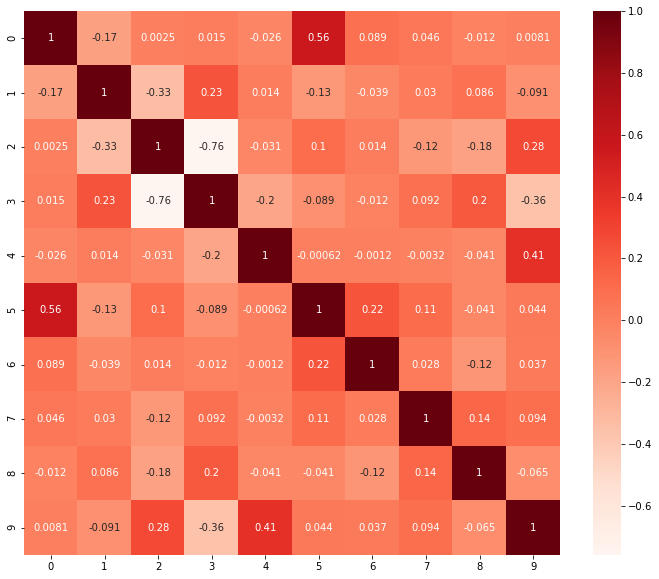

In [30]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Split the Data into Training and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=45, shuffle=True)

In [32]:
# # from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score
# features = ["c_ecg", "c_emg", "c_eda", "c_temp", "c_resp"]
# Xmk = Labeled_Data[features]
# # z = StandardScaler()
# # Xmk[features] = z.fit_transform(X)
# EM = GaussianMixture(n_components=3)

# EM.fit(Xmk)

# Cluster = EM.predict(Xmk)
# Cluster_P = EM.predict_proba(Xmk)
# Cluster_P
# # print("SILHOETTE: ", silhouette_score(X, Cluster))
# Cluster.shape

In [33]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=3)
# kf

In [34]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(GMM(gamma='auto'), norm_df.data, norm_df.target,cv=3)

## Applying GMM algorithm

In [35]:
from sklearn.mixture import GaussianMixture
EM = GaussianMixture(n_components=3, max_iter=500, random_state=45)
GMM = EM.fit(X_train)
# proba = EM.predict_proba(X_train)
prediction_gmm = EM.predict(X_train)

# gmm = GaussianMixture(n_components=10).fit(X_train)
# labels = gmm.predict(X_train)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=40, cmap='viridis');

In [36]:
LCDF = pd.DataFrame({'Clusters': prediction_gmm, 'Given Labels': y_train})
ClustersDataDF = pd.DataFrame({'Clusters': prediction_gmm, 'mean c_ecg': X_train[:,0], 'mean c_emg': X_train[:,1], 
                               'mean c_eda': X_train[:,2], 'mean c_temp': X_train[:,3], 'mean c_resp': X_train[:,4],
                               'std c_ecg': X_train[:,5], 'std c_emg': X_train[:,6], 'std c_eda': X_train[:,7],
                               'std c_temp': X_train[:,8], 'std c_resp': X_train[:,9]})


LCDF = pd.DataFrame({'Clusters': prediction_gmm, 'Given Labels': y_train})

In [37]:
#crosstab matrix (pivot table)

ctMatrix = pd.crosstab(LCDF['Clusters'], LCDF['Given Labels'], margins=True, margins_name='All')

In [38]:
#converting the clusters numbers we get into names

def convr(label):
    if label==0:
        return 'baseline'
    elif label==1:
        return 'amusement'
    elif label==2:
        return 'stress'
    
LCDF['N2L'] = LCDF['Clusters'].apply(convr)
LCDF['N2L']

2753259      stress
737209     baseline
559969     baseline
1493009    baseline
676459     baseline
             ...   
1439189    baseline
685129     baseline
582469     baseline
375979       stress
392359     baseline
Name: N2L, Length: 31037, dtype: object

In [39]:
#getting Clustering report, Confusion Matrix, and Accuracy Score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(LCDF['N2L'], LCDF['Given Labels']))
print(confusion_matrix(LCDF['N2L'], LCDF['Given Labels']))
accuracy_score(LCDF['N2L'], LCDF['Given Labels'])

              precision    recall  f1-score   support

   amusement       0.03      0.04      0.03      3391
    baseline       0.94      0.76      0.84     20517
      stress       0.70      0.89      0.78      7129

    accuracy                           0.72     31037
   macro avg       0.55      0.57      0.55     31037
weighted avg       0.78      0.72      0.74     31037

[[  143   493  2755]
 [ 4837 15680     0]
 [  224   532  6373]]


0.7151464381222412